In [11]:
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
from pylab import savefig

### Load data from project_function

In [1]:
import sys, os

data = ['CA','GB','US']

sys.path.insert(0, os.path.abspath('../submitted'))
from scripts import project_functions # This is called a relative import
df_lastdate = project_functions.load_and_process(data)

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Exploratory Data Analysis (EDA) 

*In the dataset, a video_id has one publish date and mutiple trending dates.
I would like to keep each video to have only one record so that we can define which types of video is most popular.*

### Pandas_profiling

In [123]:
#profiling = pandas_profiling.ProfileReport(df_clean)

### View data

In [3]:
df_lastdate.shape

(5398, 12)

In [5]:
df_lastdate.describe()

,view_count,likes,dislikes,comment_count,ratio
count,5.398000e+03,5.398000e+03,5398.000000,5.398000e+03,5398.000000
mean,1.979666e+06,1.066147e+05,2780.506854,1.122673e+04,72.532722
std,6.195119e+06,3.974595e+05,18766.524985,1.101723e+05,82.645420
min,2.196300e+04,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.117090e+05,9.115000e+03,211.250000,9.960000e+02,26.008948
50%,7.035000e+05,2.707250e+04,540.500000,2.455500e+03,51.011975
75%,1.671632e+06,8.139075e+04,1542.000000,6.178750e+03,90.658591
max,2.326492e+08,1.573557e+07,879357.000000,6.064909e+06,1517.853333


In [6]:
df_lastdate.describe(exclude=[np.number])

,video_id,publishedAt,channelTitle,category,trending_date,tags,country
count,5398,5398,5398,5398,5398,5398,5398
unique,5398,5269,2448,15,73,4460,3
top,epKhvHMjAvs,2020-09-18 16:00:11+00:00,Sky Sports Football,Sports,2020-10-23 00:00:00+00:00,[[None]],US
freq,1,5,87,1189,346,544,2077
first,NaN,2020-07-27 21:49:32+00:00,NaN,NaN,2020-08-12 00:00:00+00:00,NaN,NaN
last,NaN,2020-10-23 04:00:15+00:00,NaN,NaN,2020-10-23 00:00:00+00:00,NaN,NaN


### Data Analysis and Visualizations

In [95]:
sns.set_theme(style="white",
              font_scale=1,
             )

#### Added Log

In [2]:
from scripts import project_functions # This is called a relative import
df_assign = project_functions.log(df_lastdate)

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
df_assign

,video_id,publishedAt,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,country,ratio,log_likes,log_views,log_dislikes
0,uRUh9Ucr_yg,2020-08-10 23:10:13+00:00,BT Sport,Sports,2020-08-12 00:00:00+00:00,"[europa league, man utd copenhagen, man utd hi...",772339,10381,517,2466,GB,20.079304,9.247732,13.557179,6.248043
1,AdWLrHcnC5I,2020-08-11 22:56:27+00:00,BT Sport,Sports,2020-08-12 00:00:00+00:00,"[bt sport, bt sport official, bt sport footbal...",156639,2593,47,402,GB,55.170213,7.860571,11.961699,3.850148
2,WGvdHPfwD-k,2020-08-11 22:19:01+00:00,BT Sport,Sports,2020-08-12 00:00:00+00:00,"[bt sport, bt sport official, wolves, wolves s...",313473,5249,129,1114,GB,40.689922,8.565793,12.655469,4.859812
3,C_5aEQB1KUk,2020-08-09 07:07:51+00:00,TheWeasle,Sports,2020-08-12 00:00:00+00:00,"[ufc, derrick lewis, derrick lewis knockout, d...",125795,2828,99,587,GB,28.565657,7.947325,11.742409,4.595120
4,RKwW1_EUVkc,2020-08-08 19:00:02+00:00,Tyrrell's Classic Workshop,Autos & Vehicles,2020-08-12 00:00:00+00:00,"[Iain Tyrrell, Tyrrell's Classic Workshop, Cla...",71068,6527,23,979,GB,283.782609,8.783703,11.171392,3.135494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,WaT_rLGuUr8,2020-10-19 11:10:54+00:00,JunsKitchen,Howto & Style,2020-10-23 00:00:00+00:00,"[taking, cats, walk, jun, junskitchen, juns ki...",877667,89318,410,6660,CA,217.848780,11.399958,13.685023,6.016157
5394,NEpKlsUw9XU,2020-10-19 19:18:54+00:00,Louie Zong,Film & Animation,2020-10-23 00:00:00+00:00,[[None]],393634,113839,75,3929,CA,1517.853333,11.642540,12.883177,4.317488
5395,rml0FwAL8H0,2020-10-18 06:28:24+00:00,Saturday Night Live,Entertainment,2020-10-23 00:00:00+00:00,"[snl, saturday night live, season 46, snl 46, ...",1460731,62099,996,3941,CA,62.348394,11.036485,14.194448,6.903747
5396,kXZshzHH2I8,2020-10-19 23:03:45+00:00,iupdate,Science & Technology,2020-10-23 00:00:00+00:00,"[apple, iphone, 12, unboxing, magsafe, case, c...",305046,7424,1228,664,CA,6.045603,8.912473,12.628218,7.113142


##### Which category have more video pulibshed?

In [4]:
#Group category
category_group = (
    df_lastdate.groupby(by='category')
    .size()
    .sort_values(ascending = False)
    .reset_index()
    .rename(columns= {0:'#_count'})
)
category_group

,category,#_count
0,Sports,1189
1,Entertainment,1095
2,Music,967
3,People & Blogs,390
4,Gaming,340
5,Comedy,323
6,Science & Technology,239
7,News & Politics,237
8,Howto & Style,207
9,Film & Animation,134


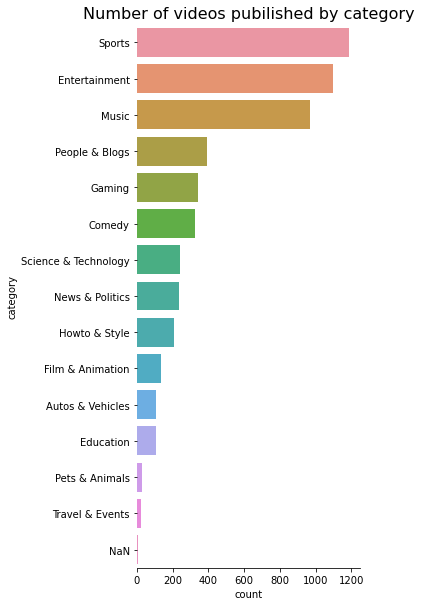

In [21]:
num_video = sns.countplot(data = df_lastdate, y='category',order=category_group['category'])
num_video = plt.gcf().set_size_inches(4,10)
num_video = sns.despine(right = True, left = True)
num_video = plt.title('Number of videos pubilished by category', fontsize=16)
num_video = num_video.get_figure()
num_video.savefig('num_video.png')

*Statistics show that the 'sport','entertainment' and 'music' are the three commons types of videos that being published on Youtube.*

In [129]:
df_assign = df_lastdate.assign(log_viewcount= np.log(df_lastdate['view_count']))

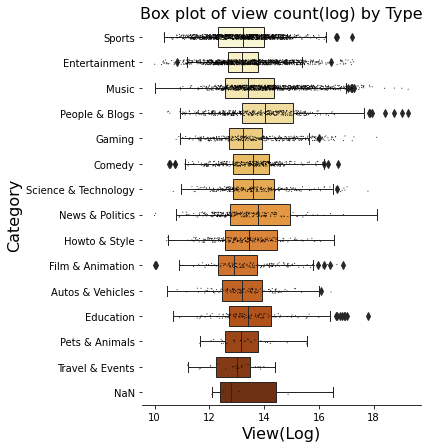

In [9]:
sns.boxplot(data = df_assign, x='log_views', y='category', 
            palette = 'YlOrBr', linewidth =1)
sns.stripplot(data = df_assign, x='log_views', y='category',
              color ='black',size = 1, order = category_group['category'])
sns.despine(right = True, left = True)
plt.gcf().set_size_inches(5,7)
plt.title('Box plot of view count(log) by Type', fontsize=16)
plt.xlabel('View(Log)', 
          fontsize = 16)
plt.ylabel('Category',fontsize = 16)
plt.show()

The boxplot shows that people in Great Britian, US and Canada are interested in watching 'People & Blogs' and 'Science & Technology'.

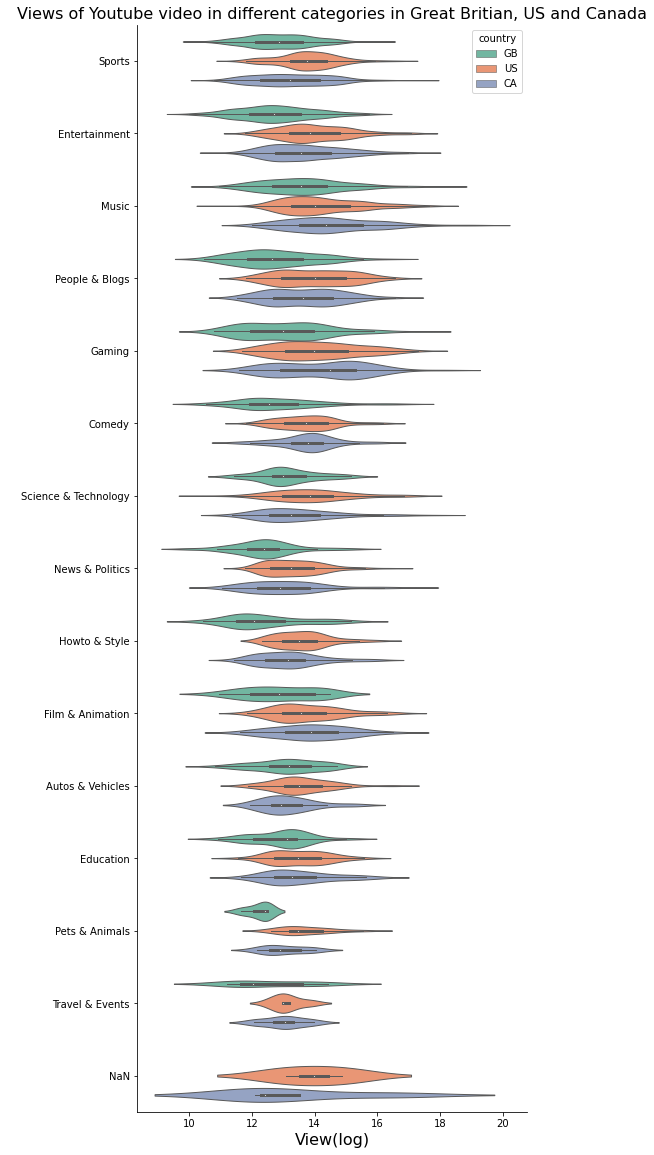

In [10]:
sns.violinplot(data = df_assign, x='log_views', y='category',
              order = category_group['category'], hue = 'country',
              palette = 'Set2',
              linewidth = 1)
sns.despine(right = True)
plt.gcf().set_size_inches(7,20)
plt.title('Views of Youtube video in different categories in Great Britian, US and Canada', fontsize=16)
plt.xlabel('View(log)', 
          fontsize = 16)
plt.ylabel(' ')
plt.show()

#### Things inside the project_function

In [177]:
# load all the dataset into a single dataframe df

country = ['CA','GB','US']

df = pd.DataFrame()
df1 = pd.DataFrame()

for c in country:
    df1 = pd.read_csv('../../data/raw/'+ c +'_youtube_trending_data.csv',parse_dates= ['trending_date','publishedAt'])
    df1['country']= c
    df = pd.concat([df,df1])

#change the datetime
df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

#category ID dictionary
category_replace = {
      1:'Film & Animation',
      2:'Autos & Vehicles',
      10:'Music',
      15:'Pets & Animals',
      17:'Sports',
      19:'Travel & Events', 
      20:'Gaming',
      21:'Videoblogging',
      22: "People & Blogs",
      23: "Comedy", 
      24: "Entertainment",
      25: "News & Politics", 
      26: "Howto & Style", 
      27: "Education", 
      28: "Science & Technology",
      29: 'NaN'
    }

#clean the dataset
df_clean = df.drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
df_clean = df_clean.replace({"categoryId":category_replace}).rename(columns= {'categoryId':'category'})
df_clean = df_clean.drop(df_clean[df_clean['category']=='NaN'].index).drop(df_clean[df_clean['view_count']==0].index).sort_values('trending_date')
df_clean = df_clean.reset_index().drop(columns = ['index'])

 #turn tags into actual list
df_clean["tags"] = df_clean.apply(lambda row: row["tags"].split("|"), axis=1)
    
#calculate the videos' like to dislike ratio (assuming that there are likes and dislikes)
df_clean["ratio"] = df_clean.apply(lambda row: 0 if row["dislikes"]==0 else (row["likes"]/row["dislikes"]), axis=1)

#drop the duplicate video and keep the video with the last trending_date
#df_lastdate = df_clean[df_clean['video_id']=='KX06ksuS6Xo']
df_lastdate = df_clean.drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')
df_lastdate = df_lastdate.drop(df_lastdate[df_lastdate['view_count']== 0 ].index)